In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
#cor para gráficos
T = '#CC8963'
CT = '#5975A4'
#Legenda para a Matrix de Confusão
x_labels = ['Falso Positivo', 'Verdadeiro Positivo']
y_labels = ['Verdadeiro Negativo', 'Falso Negativo']

In [ ]:
df = pd.read_csv('/content/csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


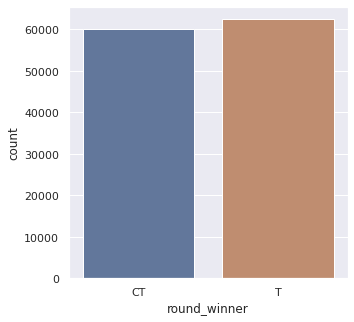

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data = df, x = 'round_winner', palette=[CT,T])

Observando os mapas mais jogados e quem ganha nestes mapas.

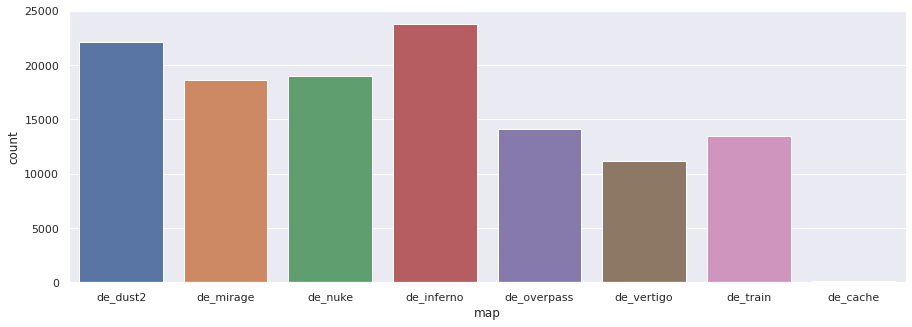

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data = df, x = 'map')

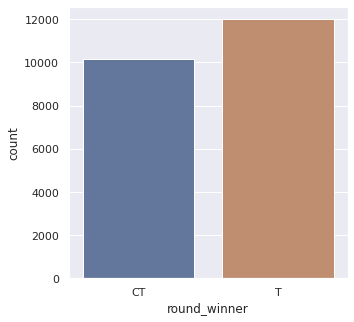

In [ ]:
#Vendo quem ganha mais no mapa dust 2(2° mais popular)
mapas_populares = ['de_dust2', 'de_inferno']
mapa1 = df[df['map'] == mapas_populares[0]]
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data = mapa1, x = 'round_winner', palette=[CT,T])

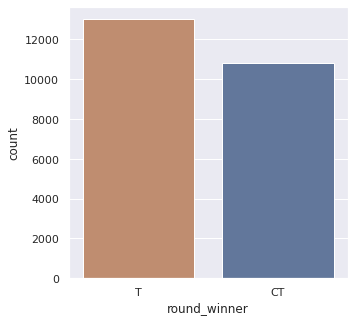

In [ ]:
#Vendo quem ganha mais no mapa inferno(1° mais popular)
mapa2 = df[df['map'] == mapas_populares[1]]
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data = mapa2, x = 'round_winner', palette=[T,CT])

É Visível que cada mapa possui uma equipe que ganha mais que a outra

Criando Encoder e o Scaler para processar os dados

In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
for column in df.columns:
    if len(df[column].unique()) == 1:
        df = df.drop([column], axis = 1)

In [ ]:
#Convertendo string da equipe para um valor inteiro
df['round_winner'] = df['round_winner'].replace({'T' : 0, 'CT' : 1})
#Convertendo string de bomba plantada para um valor inteiro
df['bomb_planted'] = df['bomb_planted'].astype(np.int16)
#Atribuindo a y o ganhador do round
y = df['round_winner']

In [ ]:
#Retirando o ganhador do round da base de dados
df = df.drop('round_winner', axis = 1)
#Convertendo map que estava em string para inteiro
df['map'] = encoder.fit_transform(df['map'])

In [ ]:
#Criando um conjunto de dados pré processados e dividindo em campos de teste e treino
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, train_size = 0.7, random_state = 24)

In [ ]:
#Implementando o modelo de árvore de decisão
Estimator = DecisionTreeClassifier()
param_grid = {'max_depth':[None,1,2,3], 'min_samples_leaf' :[2,3,4] }
Optimizer = GridSearchCV(Estimator, param_grid, cv = 5)
Optimizer.fit(X_train,y_train)
predsTrain = Optimizer.predict(X_train)
predsTest = Optimizer.predict(X_test)

In [ ]:
print('Report Treinamento')
print(classification_report(y_train, predsTrain))
print('==================================================================================')
print('Report Teste')
print(classification_report(y_test, predsTest))
print('Acurácia: ', round(accuracy_score(y_test, predsTest), 2))

Report Treinamento
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43708
           1       0.99      0.95      0.97     41979

    accuracy                           0.97     85687
   macro avg       0.97      0.97      0.97     85687
weighted avg       0.97      0.97      0.97     85687

Report Teste
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     18698
           1       0.82      0.78      0.80     18025

    accuracy                           0.81     36723
   macro avg       0.81      0.81      0.81     36723
weighted avg       0.81      0.81      0.81     36723

Acurácia:  0.81


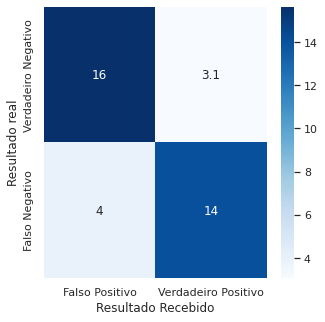

In [ ]:
cf_matrix=pd.crosstab(y_test, predsTest, rownames=['Resultado real'] , colnames=['Resultado Recebido'])
sns.heatmap((cf_matrix/1000), annot=True, cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)

In [ ]:
#Usando o modelo de regressão logistica
print ('LogisticRegression')


LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
LR.fit(X_train, y_train)
predsTrain = LR.predict(X_train)
predsTest = LR.predict(X_test)

LogisticRegression


In [ ]:
print('Report Treinamento')
print(classification_report(y_train, predsTrain))
print('==================================================================================')
print('Report Teste')
print(classification_report(y_test, predsTest))
print('Acurácia: ', round(accuracy_score(y_test, predsTest), 2))

Report Treinamento
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     43708
           1       0.74      0.75      0.75     41979

    accuracy                           0.75     85687
   macro avg       0.75      0.75      0.75     85687
weighted avg       0.75      0.75      0.75     85687

Report Teste
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     18698
           1       0.74      0.76      0.75     18025

    accuracy                           0.75     36723
   macro avg       0.75      0.75      0.75     36723
weighted avg       0.75      0.75      0.75     36723

Acurácia:  0.75


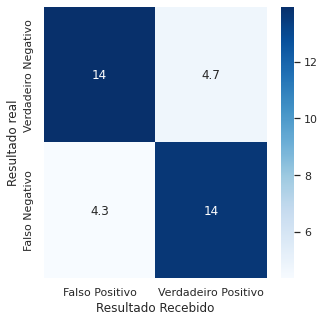

In [ ]:
cf_matrix=pd.crosstab(y_test, predsTest, rownames=['Resultado real'] , colnames=['Resultado Recebido'])
sns.heatmap((cf_matrix/1000), annot=True, cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)

In [ ]:
#Logistic Regression com hyper parametros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
predsTrain = clf.predict(X_train)
predsTest = clf.predict(X_test)

In [ ]:
print('Report Treinamento')
print(classification_report(y_train, predsTrain))
print('==================================================================================')
print('Report Teste')
print(classification_report(y_test, predsTest))
print('Acurácia: ', round(accuracy_score(y_test, predsTest), 2))

Report Treinamento
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     43708
           1       0.74      0.76      0.75     41979

    accuracy                           0.75     85687
   macro avg       0.75      0.75      0.75     85687
weighted avg       0.75      0.75      0.75     85687

Report Teste
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     18698
           1       0.74      0.76      0.75     18025

    accuracy                           0.75     36723
   macro avg       0.75      0.75      0.75     36723
weighted avg       0.75      0.75      0.75     36723

Acurácia:  0.75


In [ ]:
cf_matrix=pd.crosstab(y_test, predsTest, rownames=['Resultado real'] , colnames=['Resultado Recebido'])
sns.heatmap((cf_matrix/1000), annot=True, cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)

In [ ]:
#Implementando o SVM
clf = SVC()
clf.fit(X_train, y_train)
predsTrain = clf.predict(X_train)
predsTest = clf.predict(X_test)

SVC


In [ ]:
print('Report Treinamento')
print(classification_report(y_train, predsTrain))
print('==================================================================================')
print('Report Teste')
print(classification_report(y_test, predsTest))
print('Acurácia: ', round(accuracy_score(y_test, predsTest), 2))

Report Treinamento
              precision    recall  f1-score   support

           0       0.85      0.76      0.80     43708
           1       0.77      0.86      0.82     41979

    accuracy                           0.81     85687
   macro avg       0.81      0.81      0.81     85687
weighted avg       0.81      0.81      0.81     85687

Report Teste
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     18698
           1       0.75      0.84      0.79     18025

    accuracy                           0.79     36723
   macro avg       0.79      0.79      0.79     36723
weighted avg       0.79      0.79      0.79     36723

Acurácia:  0.79


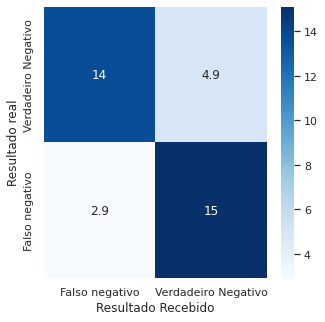

In [ ]:
cf_matrix=pd.crosstab(y_test, predsTest, rownames=['Resultado real'] , colnames=['Resultado Recebido'])
sns.heatmap((cf_matrix/1000), annot=True, cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)